In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

In [38]:
df = pd.read_csv('H1.csv')
date_index = pd.to_datetime(
    df['ArrivalDateYear'].astype(str) + '-' + \
    df['ArrivalDateMonth'].astype(str) + '-' + \
    df['ArrivalDateDayOfMonth'].astype(str),
    format='%Y-%B-%d')
df.set_index(date_index, inplace=True)

In [44]:
weekly_data = df[['IsCanceled']].resample('W').sum()

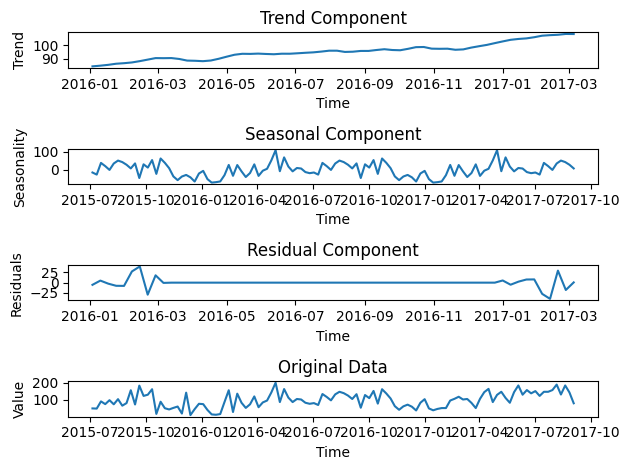

In [50]:
decomposition = seasonal_decompose(weekly_data['IsCanceled'])

# Plot the trend component
plt.subplot(411)
plt.plot(decomposition.trend)
plt.xlabel('Time')
plt.ylabel('Trend')
plt.title('Trend Component')

# Plot the seasonal component
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.xlabel('Time')
plt.ylabel('Seasonality')
plt.title('Seasonal Component')

# Plot the residual component
plt.subplot(413)
plt.plot(decomposition.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Component')

# Plot the original data
plt.subplot(414)
plt.plot(decomposition.observed)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Data')

# Adjust the layout of the plots
plt.tight_layout()

# Display the plots
plt.show()

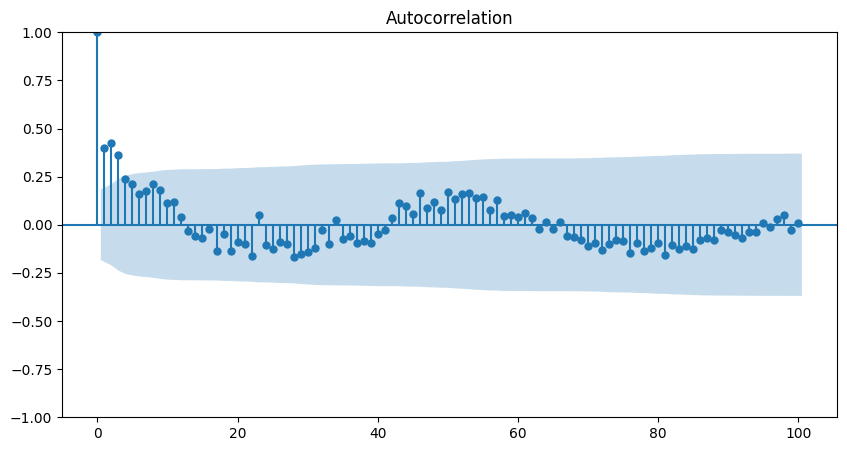

In [56]:
lags = 100  # Set the number of lags to show in the plot
acf_values, conf_int = acf(weekly_data['IsCanceled'], nlags=lags, alpha=0.05)

# Plot the ACF
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(weekly_data['IsCanceled'], lags=lags, alpha=0.05, ax=ax)

# Show the plot
plt.show()

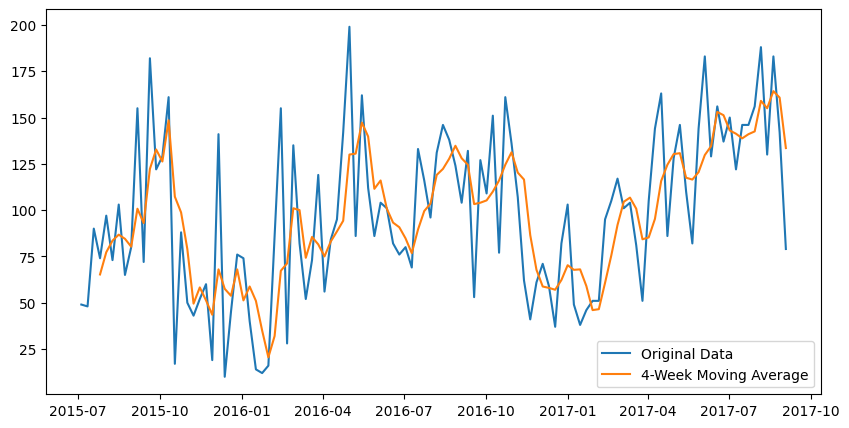

In [58]:
weekly_data['IsCanceledRolling'] = weekly_data['IsCanceled'].rolling(window=4).mean()

_, ax = plt.subplots(figsize=(10, 5))
ax.plot(weekly_data.index, weekly_data['IsCanceled'], label='Original Data')
ax.plot(weekly_data.index, weekly_data['IsCanceledRolling'], label='4-Week Moving Average')
ax.legend()

# Show the plot
plt.show()

In [65]:
train_data, test_data = train_test_split(weekly_data, test_size=0.1, shuffle=False)

train_data

,IsCanceled,IsCanceledRolling
2015-07-05,49,NaN
2015-07-12,48,NaN
2015-07-19,90,NaN
2015-07-26,74,65.25
2015-08-02,97,77.25
...,...,...
2017-05-14,110,117.50
2017-05-21,82,116.50
2017-05-28,144,120.50
2017-06-04,183,129.75
